In [20]:
import matplotlib.pyplot as plt
import pickle
import os
import numpy as np
import corner

%matplotlib inline

In [41]:
def plot_corner(runner, reference=None, discard=None, thin=1, crange=None,
                show=True, close=True, outfile=None, size=(16,16),
                show_titles=True, title=None, use_derived=True,
                title_fmt='.3f', indices=None):
    '''
    reference: list
        Reference values to plot on chains, such as true or MAP values
    discard: int
        Set to throw out first 0:discard samples. Will use self.burn_in
        if already set
    thin: int
        Thins samples by the given factor
    crange: list
        A list of tuples or floats that define the parameter ranges or
        percentile fraction that is shown. Same as corner range arg
    use_derived: bool
        Turn on to plot derived parameters as well
    '''
    
    if discard is None:
        if runner.burn_in is not None:
            discard = runner.burn_in
        else:
            raise ValueError('Must passs a value for discard if ' +\
                             'burn_in is not set!')

    chain = runner.sampler.get_chain(flat=True, discard=discard, thin=thin)
            
    if use_derived is True:
        # add derived quantity sini*vcirc
        new_shape = (chain.shape[0], chain.shape[1]+1)
        new_chain = np.zeros((new_shape))
        new_chain[:,0:-1] = chain
        i1, i2 = runner.pars_order['sini'], runner.pars_order['vcirc']
        new_chain[:,-1] = chain[:,i1] * chain[:,i2]
        chain = new_chain

    if reference is not None:
        if len(reference) != runner.ndim:
            raise ValueError('Length of reference list must be same as Ndim!')

        if use_derived is True:
            ref = reference[i1]*reference[i2]
            if isinstance(reference, list):
                reference.append(ref)
            elif isinstance(reference, np.ndarray):
                arr = np.zeros(len(reference)+1)
                arr[0:-1] = reference
                arr[-1] = ref
                reference = arr

        names = runner.ndim*['']
        for name, indx in runner.pars_order.items():
            names[indx] = name

        if use_derived is True:
            names.append('sini*vcirc')

    else:
        names = None

    if indices is not None:
        chain = chain[:,indices]
        names = np.array(names)[indices]
        reference = reference[indices]

    if crange is not None:
        if use_derived is True:
            crange.append(crange[-1])
        if len(crange) != len(names):
            raise ValueError('Length of crange list must be same as names!')

    p = corner.corner(
        chain, labels=names, truths=reference, range=crange,
        show_titles=show_titles, title_fmt=title_fmt
    )

    title_suffix = f'Burn in = {discard}'
    if title is None:
        title = title_suffix
    else:
        title += f'\n{title_suffix}'
#     plt.suptitle(title, fontsize=18)

    if size is not None:
        plt.gcf().set_size_inches(size)

    plt.tight_layout()

    if outfile is not None:
        plt.savefig(outfile, bbox_inches='tight', dpi=600, transparent=False)

    if show is True:
        plt.show()

    if close is True:
        plt.close()

    return

In [7]:
kl_dir = '/Users/sweveret/repos/kl-tools/tests/test-mcmc-run/palomar-exp-1.85e4'
truth_fname = 'test-mcmc-truth.pkl'
truth_fpath = os.path.join(kl_dir, truth_fname)
# fname = 'test-mcmc-sampler.pkl'
runner_fname = 'test-mcmc-runner.pkl'
runner_fpath = os.path.join(kl_dir, runner_fname)

with open(runner_fpath, 'rb') as f:
    runner = pickle.load(f)
with open(truth_fpath, 'rb') as f:
    truth = pickle.load(f)

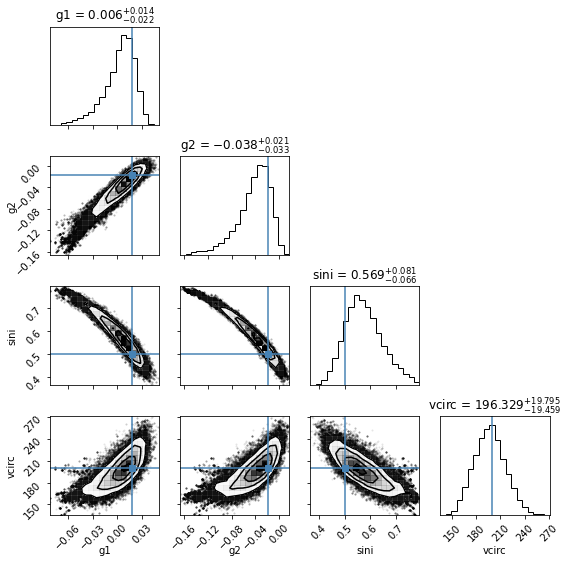

In [42]:
outfile = '/Users/sweveret/repos/palomar-proposal-2022S/out/palomar-corner-truth.png'
plot_corner(runner, outfile=outfile, reference=truth, show=True, title=None, indices=[0,1,3,5], size=(8,8))

In [5]:
ls /Users/sweveret/repos/kl-tools/tests/test-mcmc-run/palomar-exp-1.85e4

chain-probabilities.pkl  corner-map.png           test-mcmc-sampler.pkl
chain-probabilities.png  corner-truth.png         test-mcmc-truth.pkl
chains.png               datacube-slices.png      true-im.png
compare-data-to-map.png  datacube.fits            vmap.png
compare-vmap-to-map.png  test-mcmc-runner.pkl


In [14]:
runner.sampler.get_chain()

array([[[-3.01582059e-02,  4.95518809e-02,  1.37470282e+00, ...,
          5.44200516e+00,  3.77823175e+04,  3.92661358e+00],
        [-5.94718997e-02,  2.21852065e-02,  1.59500147e+00, ...,
          5.56365576e+00,  3.81300216e+04,  4.14411034e+00],
        [-9.36357024e-02, -4.19409010e-02,  1.68555437e+00, ...,
          5.08971984e+00,  3.88199403e+04,  4.51915617e+00],
        ...,
        [ 3.65274932e-02, -3.40687717e-02,  1.65109530e+00, ...,
          5.16740462e+00,  4.00430139e+04,  3.69336858e+00],
        [ 6.33083589e-03, -2.09583839e-02,  1.79249971e+00, ...,
          5.21970438e+00,  3.62589300e+04,  3.55514716e+00],
        [-1.53435810e-02,  2.90671304e-02,  1.50749853e+00, ...,
          5.32748793e+00,  4.07819145e+04,  4.19574727e+00]],

       [[-3.01582059e-02,  4.95518809e-02,  1.37470282e+00, ...,
          5.44200516e+00,  3.77823175e+04,  3.92661358e+00],
        [-7.22715897e-02,  3.05773285e-02,  1.55658489e+00, ...,
          5.63055983e+00,  3.84939790e